In [1]:
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score


In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head(3)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474


In [4]:
df.shape

(6819, 96)

In [5]:
df.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [6]:
#Checking for null values
print(df.isnull().sum())

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [7]:
#Checking dtypes
print(df.dtypes)

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object


In [8]:
#Checking duplicated rows
print(df.duplicated().sum())

0


In [9]:
#Handling categorical columns
#encoded_columns1 = pd.get_dummies(df['Bankrupt?'], prefix='Bankrupt')
#df = pd.concat([df, encoded_columns], axis=1)

In [10]:
#Columns Liability-Assets Flag are always 0 and the values of Net Income Flag are always 1,these columns have zero variance, irrelevant for modeling purposes and can be dropped.
df = df.drop(columns=[' Net Income Flag',' Liability-Assets Flag'])
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Current Liability to Current Assets,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.067250,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [11]:
#Renaming columns 
column_mapping = {
    'Bankrupt?': 'is_bankrupt',
    ' ROA(C) before interest and depreciation before interest': 'roa_c_before_interest',
    ' ROA(A) before interest and % after tax': 'roa_a_before_tax',
    ' ROA(B) before interest and depreciation after tax': 'roa_b_before_tax',
    ' Operating Gross Margin': 'operating_gross_margin',
    ' Realized Sales Gross Margin': 'realized_sales_gross_margin',
    ' Operating Profit Rate': 'operating_profit_rate',
    ' Pre-tax net Interest Rate': 'pre_tax_net_interest_rate',
    ' After-tax net Interest Rate': 'after_tax_net_interest_rate',
    ' Non-industry income and expenditure/revenue': 'non_industry_income_revenue',
    ' Continuous interest rate (after tax)': 'continuous_interest_rate',
    ' Operating Expense Rate': 'operating_expense_rate',
    ' Research and development expense rate': 'rd_expense_rate',
    ' Cash flow rate': 'cash_flow_rate',
    ' Interest-bearing debt interest rate': 'interest_bearing_debt_rate',
    ' Tax rate (A)': 'tax_rate_a',
    ' Net Value Per Share (B)': 'net_value_per_share_b',
    ' Net Value Per Share (A)': 'net_value_per_share_a',
    ' Net Value Per Share (C)': 'net_value_per_share_c',
    ' Persistent EPS in the Last Four Seasons': 'persistent_eps',
    ' Cash Flow Per Share': 'cash_flow_per_share',
    ' Revenue Per Share (Yuan ¥)': 'revenue_per_share',
    ' Operating Profit Per Share (Yuan ¥)': 'operating_profit_per_share',
    ' Per Share Net profit before tax (Yuan ¥)': 'net_profit_before_tax_per_share',
    ' Realized Sales Gross Profit Growth Rate': 'sales_gross_profit_growth_rate',
    ' Operating Profit Growth Rate': 'operating_profit_growth_rate',
    ' After-tax Net Profit Growth Rate': 'after_tax_net_profit_growth_rate',
    ' Regular Net Profit Growth Rate': 'regular_net_profit_growth_rate',
    ' Continuous Net Profit Growth Rate': 'continuous_net_profit_growth_rate',
    ' Total Asset Growth Rate': 'total_asset_growth_rate',
    ' Net Value Growth Rate': 'net_value_growth_rate',
    ' Total Asset Return Growth Rate Ratio': 'asset_return_growth_ratio',
    ' Cash Reinvestment %': 'cash_reinvestment_percentage',
    ' Current Ratio': 'current_ratio',
    ' Quick Ratio': 'quick_ratio',
    ' Interest Expense Ratio': 'interest_expense_ratio',
    ' Total debt/Total net worth': 'debt_to_net_worth',
    ' Debt ratio %': 'debt_ratio_percentage',
    ' Net worth/Assets': 'net_worth_to_assets',
    ' Long-term fund suitability ratio (A)': 'long_term_fund_suitability_a',
    ' Borrowing dependency': 'borrowing_dependency',
    ' Contingent liabilities/Net worth': 'contingent_liabilities_to_net_worth',
    ' Operating profit/Paid-in capital': 'operating_profit_to_paid_in_capital',
    ' Net profit before tax/Paid-in capital': 'net_profit_before_tax_to_paid_in_capital',
    ' Inventory and accounts receivable/Net value': 'inventory_and_receivables_to_net_value',
    ' Total Asset Turnover': 'total_asset_turnover',
    ' Accounts Receivable Turnover': 'receivable_turnover',
    ' Average Collection Days': 'average_collection_days',
    ' Inventory Turnover Rate (times)': 'inventory_turnover_times',
    ' Fixed Assets Turnover Frequency': 'fixed_assets_turnover_frequency',
    ' Net Worth Turnover Rate (times)': 'net_worth_turnover_times',
    ' Revenue per person': 'revenue_per_person',
    ' Operating profit per person': 'operating_profit_per_person',
    ' Allocation rate per person': 'allocation_rate_per_person',
    ' Working Capital to Total Assets': 'working_capital_to_total_assets',
    ' Quick Assets/Total Assets': 'quick_assets_to_total_assets',
    ' Current Assets/Total Assets': 'current_assets_to_total_assets',
    ' Cash/Total Assets': 'cash_to_total_assets',
    ' Quick Assets/Current Liability': 'quick_assets_to_current_liability',
    ' Cash/Current Liability': 'cash_to_current_liability',
    ' Current Liability to Assets': 'current_liability_to_assets',
    ' Operating Funds to Liability': 'operating_funds_to_liability',
    ' Inventory/Working Capital': 'inventory_to_working_capital',
    ' Inventory/Current Liability': 'inventory_to_current_liability',
    ' Current Liabilities/Liability': 'current_liabilities_to_liability',
    ' Working Capital/Equity': 'working_capital_to_equity',
    ' Current Liabilities/Equity': 'current_liabilities_to_equity',
    ' Long-term Liability to Current Assets': 'long_term_liability_to_current_assets',
    ' Retained Earnings to Total Assets': 'retained_earnings_to_total_assets',
    ' Total income/Total expense': 'total_income_to_total_expense',
    ' Total expense/Assets': 'total_expense_to_assets',
    ' Current Asset Turnover Rate': 'current_asset_turnover_rate',
    ' Quick Asset Turnover Rate': 'quick_asset_turnover_rate',
    ' Working capitcal Turnover Rate': 'working_capital_turnover_rate',
    ' Cash Turnover Rate': 'cash_turnover_rate',
    ' Cash Flow to Sales': 'cash_flow_to_sales',
    ' Fixed Assets to Assets': 'fixed_assets_to_assets',
    ' Current Liability to Liability': 'current_liability_to_liability',
    ' Current Liability to Equity': 'current_liability_to_equity',
    ' Equity to Long-term Liability': 'equity_to_long_term_liability',
    ' Cash Flow to Total Assets': 'cash_flow_to_total_assets',
    ' Cash Flow to Liability': 'cash_flow_to_liability',
    ' CFO to Assets': 'cfo_to_assets',
    ' Cash Flow to Equity': 'cash_flow_to_equity',
    ' Current Liability to Current Assets': 'current_liability_to_current_assets',
    ' Net Income to Total Assets': 'net_income_to_total_assets',
    ' Total assets to GNP price': 'total_assets_to_gnp_price',
    ' No-credit Interval': 'no_credit_interval',
    ' Gross Profit to Sales': 'gross_profit_to_sales',
    " Net Income to Stockholder's Equity" : 'net_income_to_stockholders_equity',
    ' Liability to Equity': 'liability_to_equity',
    ' Degree of Financial Leverage (DFL)': 'degree_of_financial_leverage',
    ' Interest Coverage Ratio (Interest expense to EBIT)': 'interest_coverage_ratio',
    ' Equity to Liability': 'equity_to_liability'
}

df.rename(columns=column_mapping, inplace=True)


In [12]:
df.head(4)

,is_bankrupt,roa_c_before_interest,roa_a_before_tax,roa_b_before_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre_tax_net_interest_rate,after_tax_net_interest_rate,non_industry_income_revenue,...,current_liability_to_current_assets,net_income_to_total_assets,total_assets_to_gnp_price,no_credit_interval,gross_profit_to_sales,net_income_to_stockholders_equity,liability_to_equity,degree_of_financial_leverage,interest_coverage_ratio,equity_to_liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.067250,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982


In [13]:
#Split X & y
X = df.drop(columns=['is_bankrupt'])
y = df['is_bankrupt']

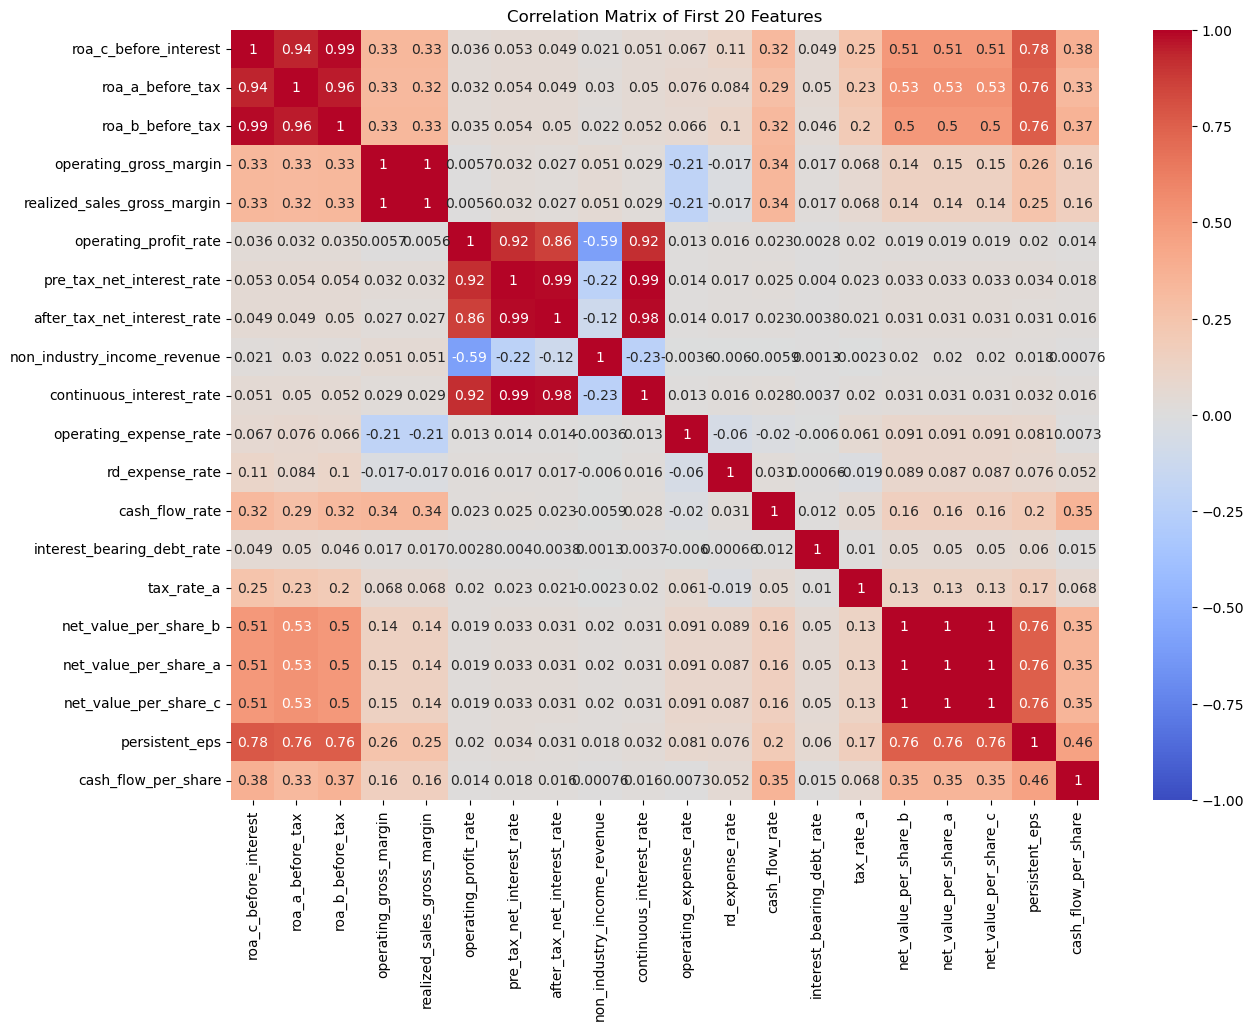

In [14]:
#Correlation
import seaborn as sns
import matplotlib.pyplot as plt

first_20_features = X.columns[:20]
subset_data = X[first_20_features]

corr_matrix = subset_data.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of First 20 Features")
plt.show()


In [15]:
correlation_matrix = X.corr()
highly_correlated_features = set()
threshold = 0.9

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated_features.add((colname_i, colname_j))

for pair in highly_correlated_features:
    print(pair)

('roa_b_before_tax', 'roa_a_before_tax')
('gross_profit_to_sales', 'realized_sales_gross_margin')
('continuous_interest_rate', 'pre_tax_net_interest_rate')
('net_value_per_share_a', 'net_value_per_share_b')
('operating_profit_to_paid_in_capital', 'operating_profit_per_share')
('current_liability_to_liability', 'current_liabilities_to_liability')
('liability_to_equity', 'current_liabilities_to_equity')
('pre_tax_net_interest_rate', 'operating_profit_rate')
('liability_to_equity', 'current_liability_to_equity')
('continuous_interest_rate', 'operating_profit_rate')
('current_liability_to_equity', 'current_liabilities_to_equity')
('net_worth_to_assets', 'debt_ratio_percentage')
('net_income_to_total_assets', 'roa_a_before_tax')
('net_profit_before_tax_to_paid_in_capital', 'net_profit_before_tax_per_share')
('realized_sales_gross_margin', 'operating_gross_margin')
('gross_profit_to_sales', 'operating_gross_margin')
('roa_b_before_tax', 'roa_c_before_interest')
('net_value_per_share_c', 'net

In [16]:
#Feature selection 
#Dropping columns: 
columns_to_drop = [
    'operating_profit_per_share',
    'net_value_per_share_b',
    'persistent_eps',
    'after_tax_net_interest_rate',
    'realized_sales_gross_margin',
    'working_capital_turnover_rate',
    'net_value_per_share_a',
    'operating_profit_rate',
    'roa_a_before_tax',
    'current_liabilities_to_equity',
    'debt_ratio_percentage',
    'current_liabilities_to_liability',
    'borrowing_dependency',
    'operating_gross_margin',
    'net_profit_before_tax_per_share'
]

df = df.drop(columns=columns_to_drop)

In [17]:
df.columns

Index(['is_bankrupt', 'roa_c_before_interest', 'roa_b_before_tax',
       'pre_tax_net_interest_rate', 'non_industry_income_revenue',
       'continuous_interest_rate', 'operating_expense_rate', 'rd_expense_rate',
       'cash_flow_rate', 'interest_bearing_debt_rate', 'tax_rate_a',
       'net_value_per_share_c', 'cash_flow_per_share', 'revenue_per_share',
       'sales_gross_profit_growth_rate', 'operating_profit_growth_rate',
       'after_tax_net_profit_growth_rate', 'regular_net_profit_growth_rate',
       'continuous_net_profit_growth_rate', 'total_asset_growth_rate',
       'net_value_growth_rate', 'asset_return_growth_ratio',
       'cash_reinvestment_percentage', 'current_ratio', 'quick_ratio',
       'interest_expense_ratio', 'debt_to_net_worth', 'net_worth_to_assets',
       'long_term_fund_suitability_a', 'contingent_liabilities_to_net_worth',
       'operating_profit_to_paid_in_capital',
       'net_profit_before_tax_to_paid_in_capital',
       'inventory_and_receivables_to

In [18]:
df.shape

(6819, 79)

In [19]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
#Scaling
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X.columns)
X_train_scaled.head()

,roa_c_before_interest,roa_a_before_tax,roa_b_before_tax,operating_gross_margin,realized_sales_gross_margin,operating_profit_rate,pre_tax_net_interest_rate,after_tax_net_interest_rate,non_industry_income_revenue,continuous_interest_rate,...,current_liability_to_current_assets,net_income_to_total_assets,total_assets_to_gnp_price,no_credit_interval,gross_profit_to_sales,net_income_to_stockholders_equity,liability_to_equity,degree_of_financial_leverage,interest_coverage_ratio,equity_to_liability
0,-0.585670,-0.344126,-0.513620,0.621173,0.622674,0.037662,0.023812,0.023783,-0.044563,0.026128,...,-0.218408,-0.229999,-0.054037,-0.270359,0.621321,-0.011010,-0.121553,-0.030926,0.048666,-0.267145
1,0.024532,-0.005633,0.123400,0.976816,0.978616,0.023133,0.028348,0.027750,0.000597,0.026628,...,-0.809180,0.096589,-0.054037,0.037025,0.976714,0.031182,-0.347015,-0.042727,-0.015070,1.346079
2,0.055532,0.145932,-0.048481,-0.367526,-0.366853,0.022755,0.022543,0.022237,-0.010308,0.020631,...,0.284849,0.233666,-0.054037,-0.017865,-0.367557,0.118829,0.152168,-0.041322,-0.006326,-0.502369
3,-1.393289,-1.530536,-1.427952,-0.742503,-0.742145,0.008341,-0.003881,0.001066,-0.028539,-0.003757,...,-0.802720,-1.427027,-0.054037,0.115880,-0.742464,-0.180996,-0.354791,-0.042761,-0.015289,1.616724
4,-0.054598,-0.133620,0.012652,0.989855,0.991665,0.021593,0.023047,0.024665,-0.006407,0.023514,...,-0.825814,-0.020427,-0.054037,0.019847,0.989711,0.014009,-0.356895,-0.042760,-0.015281,1.702346


In [21]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True)

In [22]:
no_bankrupt = df[df.is_bankrupt==0]
yes_bankrupt = df[df.is_bankrupt==1]

In [23]:
display(no_bankrupt.shape)
display(yes_bankrupt.shape)

(6599, 79)

(220, 79)

In [24]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Step 1: Oversampling the minority class (yes)
sm = SMOTE(sampling_strategy=1000/6599) #To get 1000 "yes bankrupt" samples
X_over, y_over = sm.fit_resample(X_train, y_train)

# Check how many of each class we have after oversampling
print("After oversampling minority class:", Counter(y_over))

# Step 2: Undersampling the majority class
undersampler = RandomUnderSampler(sampling_strategy=2/3) # This sets a 2:1 ratio for no:yes bankrupt
X_resampled, y_resampled = undersampler.fit_resample(X_over, y_over)

print("After undersampling majortiy class:", Counter(y_resampled))


After oversampling minority class: Counter({0: 4946, 1: 749})
After undersampling majortiy class: Counter({0: 1123, 1: 749})


In [25]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')
model1 = LogisticRegression()
model1.fit(X_resampled, y_resampled)

LogisticRegression()

In [26]:
#LogisticRegression MODEL
y_pred = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.84
Recall: 0.17
Precision: 0.04
F1 Score: 0.06


In [27]:
#Grid search
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2','l1'],
    'solver': ['lbfgs', 'liblinear']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

print("Best Hyperparameters:", grid_search.best_params_)
model1 = grid_search.best_estimator_
y_pred = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

Best Hyperparameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.91
Recall: 0.73
Precision: 0.21
F1 Score: 0.33


In [28]:
#AUC score
Y_score = model1.predict_proba(X_test)[:,1]
print(f"ROC_AUC Score:",roc_auc_score(y_test, Y_score))

ROC_AUC Score: 0.9225883009912048


In [29]:
#XGBoostClassifier MODEL
import xgboost as xgb
model2 = xgb.XGBClassifier(use_label_encoder=False) 
model2.fit(X_resampled, y_resampled, eval_metric='logloss')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
y_pred = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.94
Recall: 0.58
Precision: 0.27
F1 Score: 0.36


In [40]:
#Grid search
import xgboost as xgb
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.5],
    'max_depth': [3, 5],
    'subsample': [0.8, 1],
    'n_estimators': [50, 100],
}

model2 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
grid_search = GridSearchCV(model2, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

best_model2 = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
y_pred = best_model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

Best Parameters: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}
Accuracy: 0.94
Recall: 0.62
Precision: 0.30
F1 Score: 0.40


In [50]:
#AUC score
Y_score = best_model2.predict_proba(X_test)[:,1]
print(f"ROC_AUC Score:",roc_auc_score(y_test, Y_score))

ROC_AUC Score: 0.945285960258737


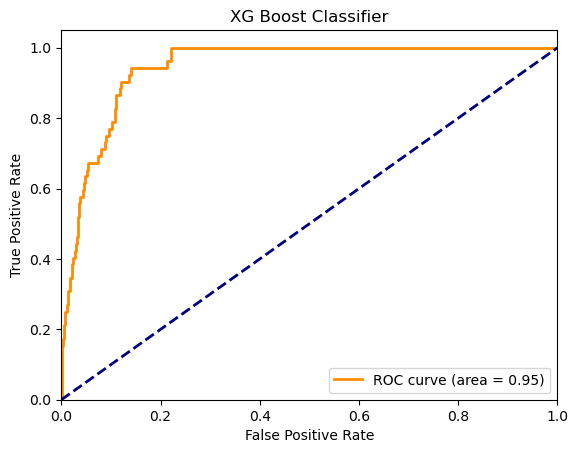

In [53]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, Y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG Boost Classifier')
plt.legend(loc="lower right")
plt.show()

In [41]:
#DecisionTreeClassifier MODEL
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(random_state=0)
model3.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=0)

In [42]:
y_pred = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.90
Recall: 0.54
Precision: 0.16
F1 Score: 0.25


In [35]:
#Grid search
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dtc = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_resampled, y_resampled)
best_dtc = grid_search.best_estimator_

print("Best parameters found: ", grid_search.best_params_)
y_pred = best_dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.90
Recall: 0.52
Precision: 0.16
F1 Score: 0.25


In [36]:
#AUC score
Y_score = best_dtc.predict_proba(X_test)[:,1]
print(f"ROC_AUC Score:",roc_auc_score(y_test, Y_score))

ROC_AUC Score: 0.7268544371538926


In [37]:
#Gradient Tree Boosting MODEL
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model4.fit(X_resampled, y_resampled)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [38]:
y_pred = model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.92
Recall: 0.65
Precision: 0.22
F1 Score: 0.33


In [43]:
#Grid search
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 1.0],
    'max_depth': [1, 3],
    'subsample': [0.9, 1.0],
    'random_state': [0]
}

model4 = GradientBoostingClassifier()
grid_search = GridSearchCV(model4, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)
best_model4 = grid_search.best_estimator_

print("\nBest Parameters:", grid_search.best_params_)
y_pred = best_model4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")


Best Parameters: {'learning_rate': 1.0, 'max_depth': 3, 'n_estimators': 100, 'random_state': 0, 'subsample': 0.9}
Accuracy: 0.94
Recall: 0.54
Precision: 0.25
F1 Score: 0.35


In [44]:
#AUC score
Y_score = best_model4.predict_proba(X_test)[:,1]
print(f"ROC_AUC Score:",roc_auc_score(y_test, Y_score))

ROC_AUC Score: 0.9056145004420866


In [45]:
#AdaBoostClassifier MODEL
from sklearn.ensemble import AdaBoostClassifier
model5 = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
model5.fit(X_resampled, y_resampled)

AdaBoostClassifier(random_state=42)

In [46]:
y_pred = model5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.92
Recall: 0.54
Precision: 0.20
F1 Score: 0.29


In [47]:
#Grid search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1.0]
}

model5 = AdaBoostClassifier(random_state=42)
grid_search = GridSearchCV(model5, param_grid, cv=3, scoring='accuracy',verbose=1)
grid_search.fit(X_resampled, y_resampled)
best_model5 = grid_search.best_estimator_

print("\nBest Parameters:", grid_search.best_params_)
y_pred = best_model5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
Accuracy: 0.92
Recall: 0.54
Precision: 0.20
F1 Score: 0.29


In [48]:
Y_score = best_model5.predict_proba(X_test)[:,1]
print(f"ROC_AUC Score:",roc_auc_score(y_test, Y_score))

ROC_AUC Score: 0.8854413886174323
